<a href="https://colab.research.google.com/github/pravallika2580/Taxi_Fare_Prediction/blob/main/Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:- Taxi Fare Prediction**

The objective of this project is to develop a machine learning model that accurately predicts taxi fare amounts based on various ride attributes

# **1.Data Loading and Preprocessing**

**Loading train data**

We are given three datasets

Train.csv-->to train the model

test.csv-->to test the model

sample.csv-->sample output is provided

This code loads the training dataset using pandas into train_data dataframe.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data=pd.read_csv("train.csv")
train_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


The **shape** attribute shows the number of rows and columns in the train dataset, which helps to understand the dataset size.

In [ ]:
train_data.shape #total rows and columns

(175000, 17)

In [ ]:
train_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

> The train data has  **17 Features** 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee'


The head() function is used to print the first 5 rows of each dataset to give an overview of the data structure.

In [ ]:
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


**Loading Test Data**

This code loads the training dataset using pandas into test_data dataframe.

In [ ]:
import pandas as pd
test_data=pd.read_csv("test.csv")
test_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


The **shape** attribute shows the number of rows and columns in the train dataset, which helps to understand the dataset size.

In [ ]:
test_data.shape

(50000, 16)

In [ ]:
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


# **2.Understanding Data Structure**

**Columns and their Data types**

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
# Check the basic structure and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [ ]:
# Check the basic structure and data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [ ]:
#Get summary statistics for numerical columns
#Computes statistical summaries for numerical columns, including mean, standard deviation, min, max, and quartiles.
train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [ ]:
#Get summary statistics for numerical columns
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,50000.000000,48221.000000,50000.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000
mean,0.730280,1.358309,3.999013,1.567014,132.208160,132.559300,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133
std,0.444584,0.879948,78.958759,6.875115,76.483766,76.410602,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000
25%,0.000000,1.000000,1.090000,1.000000,66.000000,67.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.850000,1.000000,132.000000,133.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,3.600000,1.000000,199.000000,199.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000
max,2.000000,8.000000,17624.430000,99.000000,264.000000,264.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000


# **Identifying Target Variable**

The target variable is the column representing the outcome or value we aim to predict.We define total_amount as the target variable (the variable we are trying to predict),and the remaining columns as the features (the inputs to the model).

In [ ]:
target = 'total_amount'  # Target variable
features = train_data.columns.drop(target)
print("\nTarget Variable:", target)
print("Input Features:", features)


Target Variable: total_amount
Input Features: Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')


# ****3.Checking for missing values****

This function isnull().sum() counts the number of missing (null) values in each column, so we can see which columns are incomplete.

In [ ]:
# Check for missing values in the train dataset
print("\nMissing Values in Train Dataset:")
train_data.isnull().sum()


Missing Values in Train Dataset:


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,6077
trip_distance,0
RatecodeID,6077
store_and_fwd_flag,6077
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
# Check for missing values in the test dataset
print("\nMissing Values in Test Dataset:")
test_data.isnull().sum()


Missing Values in Test Dataset:


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,1779
trip_distance,0
RatecodeID,1779
store_and_fwd_flag,1779
PULocationID,0
DOLocationID,0
payment_type,0


**Percentage of Missing Data**

The percentage of missing values is calculated by dividing the number of missing values by the total number of entries, multiplied by 100. This helps to decide whether you need to impute or drop missing values.

* **Imputation**: For columns with a moderate percentage of missing values (e.g., 5% - 30%), imputation strategies (like filling with mean, median, or mode) can be applied to retain the information.
* **Deletion**: For columns with a very high percentage of missing values, it might be more beneficial to remove the column to simplify the dataset and reduce noise.

In [ ]:
train_data.isnull().sum()/train_data.shape[0]*100

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.472571
trip_distance,0.000000
RatecodeID,3.472571
store_and_fwd_flag,3.472571
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


In [ ]:
test_data.isnull().sum()/test_data.shape[0]*100

,0
VendorID,0.000
tpep_pickup_datetime,0.000
tpep_dropoff_datetime,0.000
passenger_count,3.558
trip_distance,0.000
RatecodeID,3.558
store_and_fwd_flag,3.558
PULocationID,0.000
DOLocationID,0.000
payment_type,0.000


# **4.Handling Missing Values**

**Imputation**: This replaces missing values in numerical columns with the median and categorical columns with the mode.

In [ ]:
# Fill missing values for numerical columns with median
numerical_cols = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'Airport_fee']
for col in numerical_cols:
    train_data[col].fillna(train_data[col].median(),inplace=True)
    test_data[col].fillna(test_data[col].median(),inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = ['store_and_fwd_flag']
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0],inplace=True)
    test_data[col].fillna(test_data[col].mode()[0],inplace=True)



> Replaces missing values in numerical columns with their median.

> Replaces missing values in categorical columns with their mode.

In [ ]:
train_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
test_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


# **5.Identifying Outliners**

An outlier is a data point significantly different from other data points in a dataset. Outliers can occur for various reasons, such as measurement errors, data entry errors, or natural variations in the data.
* **Statistical Methods:**
* **Z-Score**: This method calculates the standard deviation of the data points and identifies outliers as those with Z-scores exceeding a certain threshold (typically 3 or -3).
* **Interquartile Range (IQR):** IQR identifies outliers as data points falling outside the range defined by Q1-k*(Q3-Q1) and Q3+k*(Q3-Q1), where Q1 and Q3 are the first and third quartiles, and k is a factor (typically 1.5).The IQR helps in understanding the spread of the central 50% of the data. Values that fall below
𝑄1−1.5×𝐼𝑄𝑅 or above Q3+1.5×IQR are considered outliers.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get a list of numerical columns in the dataframe
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outliers in each column
outliers_dict = {}

# Detect outliers for each numerical column
for column in numerical_columns:
    outliers_dict[column] = detect_outliers(train_data, column)
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers_dict[column])}")



Column: VendorID
Number of outliers: 0
Column: passenger_count
Number of outliers: 40389
Column: trip_distance
Number of outliers: 24133
Column: RatecodeID
Number of outliers: 10271
Column: PULocationID
Number of outliers: 0
Column: DOLocationID
Number of outliers: 0
Column: extra
Number of outliers: 4406
Column: tip_amount
Number of outliers: 11218
Column: tolls_amount
Number of outliers: 15672
Column: improvement_surcharge
Number of outliers: 1855
Column: total_amount
Number of outliers: 23479
Column: congestion_surcharge
Number of outliers: 15711
Column: Airport_fee
Number of outliers: 15849


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get a list of numerical columns in the dataframe
numerical_columns = test_data.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outliers in each column
outliers_dict = {}

# Detect outliers for each numerical column
for column in numerical_columns:
    outliers_dict[column] = detect_outliers(test_data, column)
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers_dict[column])}")

Column: VendorID
Number of outliers: 0
Column: passenger_count
Number of outliers: 11689
Column: trip_distance
Number of outliers: 6717
Column: RatecodeID
Number of outliers: 2848
Column: PULocationID
Number of outliers: 0
Column: DOLocationID
Number of outliers: 0
Column: extra
Number of outliers: 1225
Column: tip_amount
Number of outliers: 3087
Column: tolls_amount
Number of outliers: 4251
Column: improvement_surcharge
Number of outliers: 491
Column: congestion_surcharge
Number of outliers: 4359
Column: Airport_fee
Number of outliers: 4346


> This function detects outliers using the IQR method, returning rows where values fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5* * IQR].

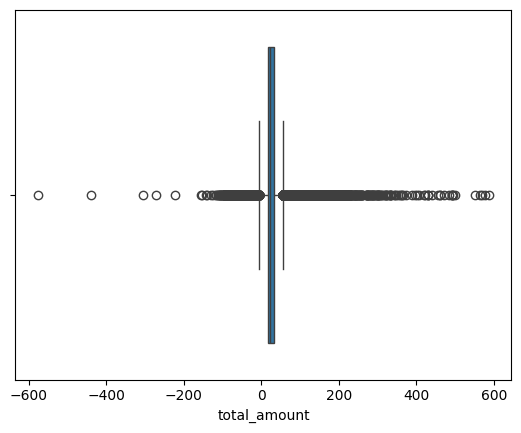

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="total_amount",data=train_data)
plt.show()

> From Box plot we can see that there are negative values in the total_amount

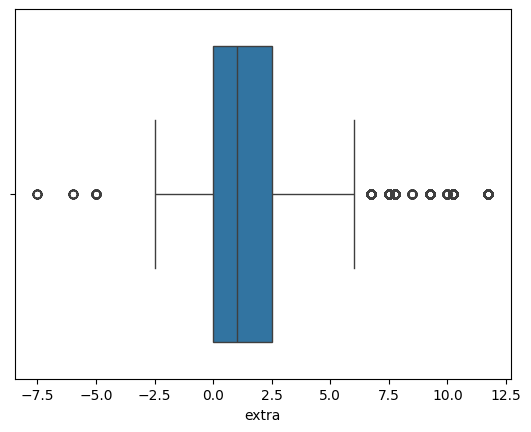

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="extra",data=train_data)
plt.show()

# **6.Handling the Outliners**

In [ ]:
import numpy as np

# Cap passenger_count at 6 and replace values below 1 with median or mode
train_data['passenger_count'] = np.where(train_data['passenger_count'] > 6, 6, train_data['passenger_count'])
train_data['passenger_count'] = np.where(train_data['passenger_count'] < 1, train_data['passenger_count'].mode()[0],
                                         train_data['passenger_count'])

# Cap trip_distance at the 99th percentile (using the threshold from train_data)
trip_distance_cap = train_data['trip_distance'].quantile(0.99)
train_data['trip_distance'] = np.where(train_data['trip_distance'] > trip_distance_cap, trip_distance_cap, train_data['trip_distance'])

# Replace unusual RatecodeID (e.g., 99 or other anomalies) with mode
ratecode_mode = train_data['RatecodeID'].mode()[0]
train_data['RatecodeID'] = np.where(train_data['RatecodeID'] == 99, ratecode_mode, train_data['RatecodeID'])

# Cap extreme values in monetary columns (using thresholds from train_data)
monetary_columns = ['extra', 'tip_amount', 'tolls_amount', 'total_amount','improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
for col in monetary_columns:
    upper_bound = train_data[col].quantile(0.99)
    train_data[col] = np.where(train_data[col] > upper_bound, upper_bound, train_data[col])
    train_data[col] = np.where(train_data[col] < 0, 0, train_data[col])

# Apply log transformation for 'trip_distance' in train_data
train_data['trip_distance'] = np.log1p(train_data['trip_distance'])



In [ ]:
train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,1.361320,1.224861,1.081429,132.710349,132.701429,1.925666,6.065921,0.577075,0.989546,29.499494,2.275557,0.155900
std,0.445606,0.862054,0.709615,0.411630,76.148799,76.192493,1.850695,4.093433,1.852909,0.101208,22.308673,0.714658,0.498519
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000079,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.732368,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.043804,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,1.528228,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,6.000000,3.090588,5.000000,264.000000,264.000000,7.500000,21.566640,6.550000,1.000000,107.500000,2.500000,1.750000


In [ ]:
import numpy as np

# Cap passenger_count at 6 and replace values below 1 with median or mode
test_data['passenger_count'] = np.where(test_data['passenger_count'] > 6, 6, test_data['passenger_count'])
test_data['passenger_count'] = np.where(test_data['passenger_count'] < 1, test_data['passenger_count'].mode()[0],
                                         test_data['passenger_count'])

# Cap trip_distance at the 99th percentile (using the threshold from train_data)
trip_distance_cap = train_data['trip_distance'].quantile(0.99)
test_data['trip_distance'] = np.where(test_data['trip_distance'] > trip_distance_cap, trip_distance_cap, test_data['trip_distance'])

# Replace unusual RatecodeID (e.g., 99 or other anomalies) with mode
ratecode_mode = train_data['RatecodeID'].mode()[0]
test_data['RatecodeID'] = np.where(test_data['RatecodeID'] == 99, ratecode_mode, test_data['RatecodeID'])

# Cap extreme values in monetary columns (using thresholds from train_data)
monetary_columns = ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
for col in monetary_columns:
    upper_bound = train_data[col].quantile(0.99)
    test_data[col] = np.where(test_data[col] > upper_bound, upper_bound, test_data[col])
    test_data[col] = np.where(test_data[col] < 0, 0, test_data[col])

# Apply log transformation for 'trip_distance' in test_data
test_data['trip_distance'] = np.log1p(test_data['trip_distance'])


In [ ]:
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.730280,1.361140,1.012767,1.080360,132.208160,132.559300,1.912435,6.051417,0.547802,0.990354,2.282050,0.149415
std,0.444584,0.850913,0.367192,0.416012,76.483766,76.410602,1.843345,4.070637,1.810456,0.097115,0.705254,0.489036
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.737164,1.000000,66.000000,67.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.047319,1.000000,132.000000,133.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,1.408689,1.000000,199.000000,199.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000
max,2.000000,6.000000,1.408689,6.000000,264.000000,264.000000,7.500000,21.566629,6.550000,1.000000,2.500000,1.750000


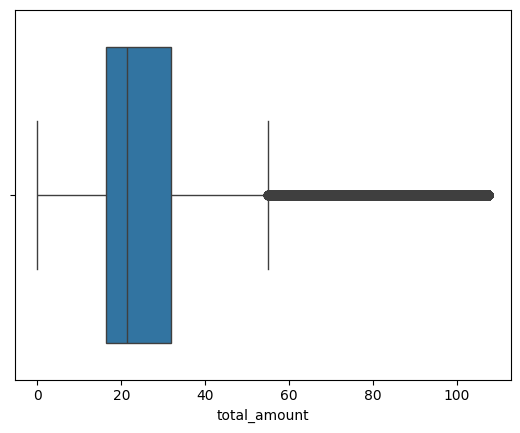

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="total_amount",data=train_data)
plt.show()

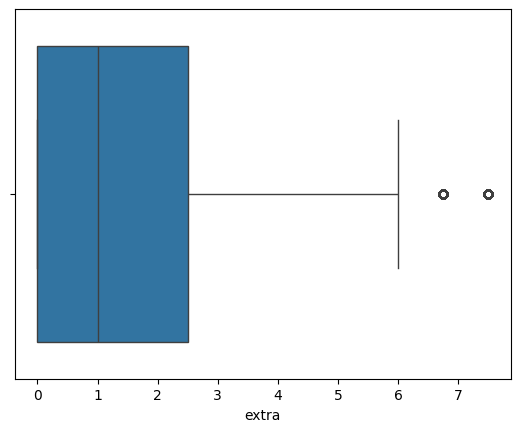

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="extra",data=train_data)
plt.show()

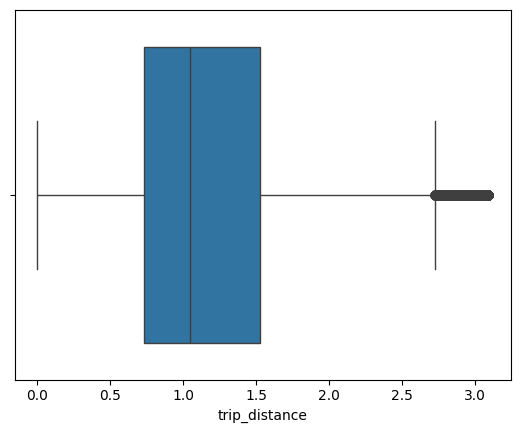

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="trip_distance",data=train_data)
plt.show()

# **7.Exploratory Data Analysis**

**EDA**
* Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

# **Summary Statistics**:
Using functions like describe() in Pandas to get a quick overview of numerical features.
* **1. Minimum (Min):** The minimum value in a dataset. It represents the smallest observation.
* **25th Percentile (Q1):** The 25th percentile, also known as the first quartile (Q1), is the value below which 25% of the data falls.This means that one-quarter of the observations in the dataset are less than or equal to Q1.
* **75th Percentile (Q3):** The 75th percentile, also known as the third quartile (Q3), is the value below which 75% of the data falls. This means that three-quarters of the observations in the dataset are less than or equal to Q3.
* **4. Maximum (Max):** The maximum value in a dataset. It represents the largest observation.

In [ ]:

# Select numerical columns
numerical_data = train_data.select_dtypes(include=['int64', 'float64'])

# Display basic summary statistics (mean, median, standard deviation)
print("\nSummary Statistics (Mean, Median, Standard Deviation):")
print(numerical_data.describe())

# Median for all numerical columns (describe doesn't give median by default)
median_values = numerical_data.median()
print("\nMedian of Numerical Features:")
print(median_values)



Summary Statistics (Mean, Median, Standard Deviation):
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  175000.000000    175000.000000  175000.000000  175000.000000   
mean        0.728377         1.361320       1.224861       1.081429   
std         0.445606         0.862054       0.709615       0.411630   
min         0.000000         1.000000       0.000000       1.000000   
25%         0.000000         1.000000       0.732368       1.000000   
50%         1.000000         1.000000       1.043804       1.000000   
75%         1.000000         1.000000       1.528228       1.000000   
max         2.000000         6.000000       3.090588       5.000000   

        PULocationID   DOLocationID          extra     tip_amount  \
count  175000.000000  175000.000000  175000.000000  175000.000000   
mean      132.710349     132.701429       1.925666       6.065921   
std        76.148799      76.192493       1.850695       4.093433   
min         1.000000       1

# **8.Relationship between Input features and Target Variable**

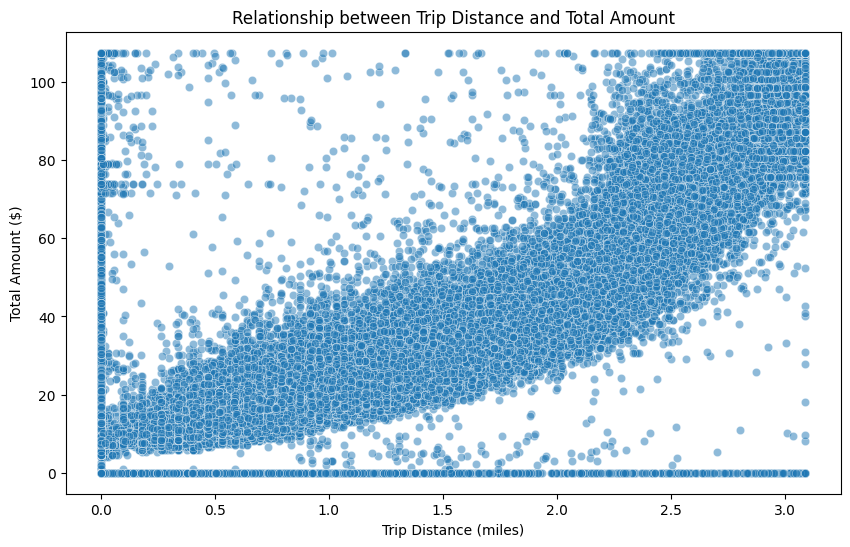

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of trip_distance vs total_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='total_amount', data=train_data, alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Total Amount ($)")
plt.title("Relationship between Trip Distance and Total Amount")
plt.show()


> There is a general upward trend, suggesting a positive correlation between trip_distance and total_amount. As trip distance increases, the total fare amount also tends to increase.

**Correlation Matrix**

A correlation matrix is a table that displays the correlation coefficients between variables in a dataset. The values in the matrix range from -1 to 1, where:

*  1 indicates a perfect positive correlation (as one variable increases, the other also increases).
* -1 indicates a perfect negative correlation (as one variable increases, the other decreases).
*  0 indicates no correlation

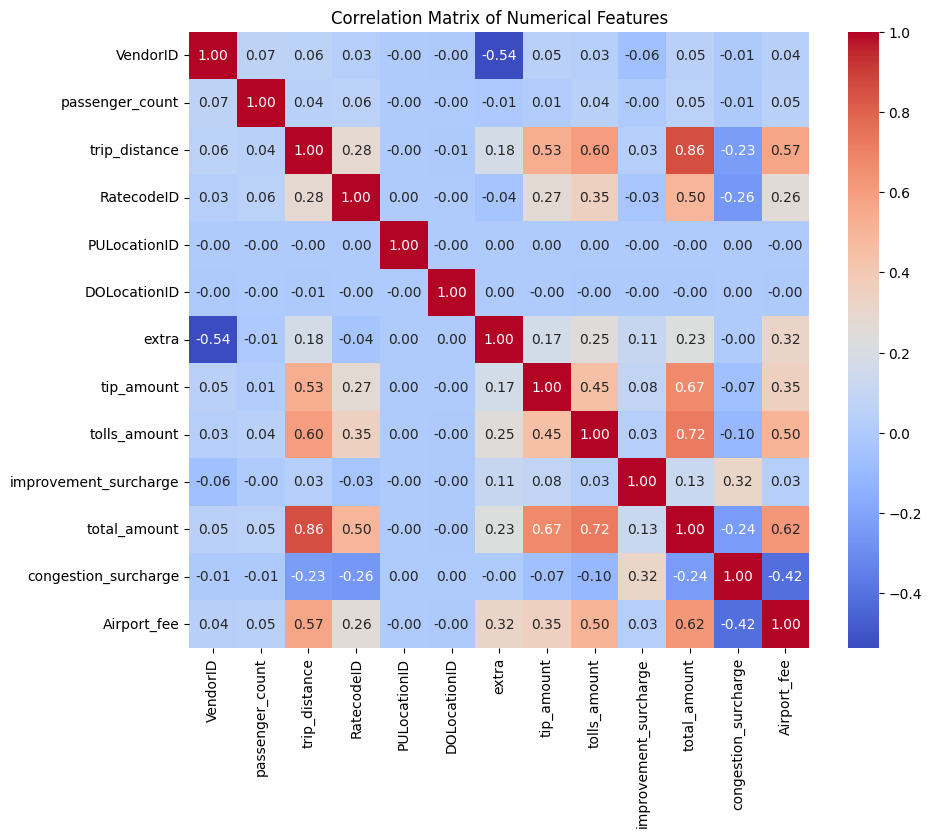

In [ ]:
# Compute the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Obervations:**

Positive Correlations:
> trip_distance and total_amount (0.86):
> The longer the trip, the higher the total amount. This makes sense as the fare is distance-dependent.

> tolls_amount and total_amount (0.72):
> Trips with tolls contribute significantly to the total fare.

> tip_amount and total_amount (0.67):
> Higher tips are positively correlated with the total fare, likely reflecting high-value rides.

> Airport_fee and trip_distance (0.57):
> Airport-related trips may tend to cover longer distances.

Negative Correlation:
> congestion_surcharge and Airport_fee (-0.42):Congestion surcharges are less likely for airport trips, hence a negative correlation.

# **8.Extract Features from Datetime Columns**

Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model. It involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model.

In [ ]:
# Convert 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime format
train_data['tpep_pickup_datetime'] = pd.to_datetime(train_data['tpep_pickup_datetime'], errors='coerce')
train_data['tpep_dropoff_datetime'] = pd.to_datetime(train_data['tpep_dropoff_datetime'], errors='coerce')

# Extract features from 'tpep_pickup_datetime'
train_data['pickup_day'] = train_data['tpep_pickup_datetime'].dt.day
train_data['pickup_hour'] = train_data['tpep_pickup_datetime'].dt.hour

# Extract features from 'tpep_dropoff_datetime'
train_data['dropoff_day'] = train_data['tpep_dropoff_datetime'].dt.day
train_data['dropoff_hour'] = train_data['tpep_dropoff_datetime'].dt.hour

# Verify the extracted features
print(train_data[['pickup_day', 'pickup_hour', 'dropoff_day', 'dropoff_hour']].head())


   pickup_day  pickup_hour  dropoff_day  dropoff_hour
0          28           17           28            16
1          29           23           29            22
2          30           10           30            11
3          29           13           29            14
4          29           22           29            22


In [ ]:
# Drop the original datetime columns after extracting the features
train_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)


# **9.Categorical Values**

Categorical features (also known as categorical variables) are variables in a dataset that represent discrete categories or labels, as opposed to numerical values. These features take on a limited, fixed number of possible values, and the values typically represent different groups or classifications rather than quantities.

**Checking Categorical values**

In [ ]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['store_and_fwd_flag', 'payment_type'], dtype='object')


# **10.Applying transformations for categorical values**

We can handle the Categorical values by two methods

**1.Label Encoding:** This method is useful for ordinal categorical variables where the order of categories matters. It assigns a unique integer to each category.

**2.One-Hot Encoding:** This creates a binary column for each category, allowing models to interpret the data without assuming an ordinal relationship.

In [ ]:
train_data.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_day',
       'pickup_hour', 'dropoff_day', 'dropoff_hour'],
      dtype='object')

In [ ]:
# Get the unique values of column
print(train_data.store_and_fwd_flag.unique())
print(train_data.payment_type.unique())

['N' 'Y']
['Credit Card' 'Cash' 'Wallet' 'UPI' 'unknown']


> We can observe that store_and_fwd_flag is ordinal data we can use One-Hot-Encoding and the payment_type is nominal data we use label Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Extract the relevant column
en_data = train_data[['store_and_fwd_flag']]

# Apply OneHotEncoder with drop='first'
ohe = OneHotEncoder(drop='first')
ar = ohe.fit_transform(en_data).toarray()  # Convert to dense array

# Create DataFrame with the correct column names
encoded_df = pd.DataFrame(ar, columns=ohe.get_feature_names_out(['store_and_fwd_flag']))

# Display the encoded DataFrame to verify the output
print(encoded_df)

# Concatenate with the original train_data
train_data = pd.concat([train_data, encoded_df], axis=1)



        store_and_fwd_flag_Y
0                        0.0
1                        0.0
2                        0.0
3                        0.0
4                        0.0
...                      ...
174995                   0.0
174996                   0.0
174997                   0.0
174998                   0.0
174999                   0.0

[175000 rows x 1 columns]


> The store_and_fwd_flag column is now encoded to store_and_fwd_flag_Y

In [ ]:
# Drop the original datetime columns after encoding
train_data.drop(['store_and_fwd_flag'], axis=1, inplace=True)

# Verify the DataFrame after dropping the columns
print(train_data.head())


   VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0         1              1.0       1.144223         1.0           120   
1         0              1.0       1.308333         1.0            15   
2         1              1.0       0.765468         1.0           167   
3         0              1.0       0.336472         1.0           128   
4         1              3.0       0.741937         1.0           203   

   DOLocationID payment_type  extra  tip_amount  tolls_amount  \
0             9  Credit Card    2.5    7.165589           0.0   
1           215  Credit Card    3.5    6.067401           0.0   
2           223  Credit Card    0.0    4.111547           0.0   
3           239  Credit Card    2.5    6.411079           0.0   
4            52  Credit Card    1.0    4.769377           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.64                   2.5          0.0   
1               

In [ ]:
# One-Hot Encoding the 'payment_type' column
one_hot_encoded = pd.get_dummies(train_data['payment_type'], prefix='payment_type')

# Concatenate the one-hot encoded columns back to the original DataFrame
train_data = pd.concat([train_data, one_hot_encoded], axis=1)

# Display only the 'payment_type' and newly one-hot encoded columns
print(train_data[['payment_type'] + list(one_hot_encoded.columns)])

       payment_type  payment_type_Cash  payment_type_Credit Card  \
0       Credit Card              False                      True   
1       Credit Card              False                      True   
2       Credit Card              False                      True   
3       Credit Card              False                      True   
4       Credit Card              False                      True   
...             ...                ...                       ...   
174995  Credit Card              False                      True   
174996         Cash               True                     False   
174997  Credit Card              False                      True   
174998  Credit Card              False                      True   
174999  Credit Card              False                      True   

        payment_type_UPI  payment_type_Wallet  payment_type_unknown  
0                  False                False                 False  
1                  False                Fal

In [ ]:
# Drop the original datetime columns after encoding
train_data.drop(['payment_type'], axis=1, inplace=True)

# Verify the DataFrame after dropping the columns
print(train_data.head())


   VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0         1              1.0       1.144223         1.0           120   
1         0              1.0       1.308333         1.0            15   
2         1              1.0       0.765468         1.0           167   
3         0              1.0       0.336472         1.0           128   
4         1              3.0       0.741937         1.0           203   

   DOLocationID  extra  tip_amount  tolls_amount  improvement_surcharge  ...  \
0             9    2.5    7.165589           0.0                    1.0  ...   
1           215    3.5    6.067401           0.0                    1.0  ...   
2           223    0.0    4.111547           0.0                    1.0  ...   
3           239    2.5    6.411079           0.0                    1.0  ...   
4            52    1.0    4.769377           0.0                    1.0  ...   

   pickup_day  pickup_hour  dropoff_day  dropoff_hour  store_and_fwd_flag_Y  \
0

In [ ]:
train_data.shape

(175000, 23)

In [ ]:
train_data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,pickup_day,pickup_hour,dropoff_day,dropoff_hour,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1,1.0,1.144223,1.0,120,9,2.5,7.165589,0.0,1.0,...,28,17,28,16,0.0,False,True,False,False,False
1,0,1.0,1.308333,1.0,15,215,3.5,6.067401,0.0,1.0,...,29,23,29,22,0.0,False,True,False,False,False
2,1,1.0,0.765468,1.0,167,223,0.0,4.111547,0.0,1.0,...,30,10,30,11,0.0,False,True,False,False,False
3,0,1.0,0.336472,1.0,128,239,2.5,6.411079,0.0,1.0,...,29,13,29,14,0.0,False,True,False,False,False
4,1,3.0,0.741937,1.0,203,52,1.0,4.769377,0.0,1.0,...,29,22,29,22,0.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,1.492904,1.0,147,167,1.0,8.732495,0.0,1.0,...,30,22,30,22,0.0,False,True,False,False,False
174996,1,1.0,2.345645,1.0,154,191,5.0,0.283275,0.0,1.0,...,30,13,30,14,0.0,True,False,False,False,False
174997,0,1.0,1.223775,1.0,168,106,2.5,4.245354,0.0,1.0,...,29,11,29,12,0.0,False,True,False,False,False
174998,1,1.0,1.742219,1.0,240,100,2.5,10.479776,0.0,1.0,...,29,19,29,19,0.0,False,True,False,False,False


# **11.Split Data into Features and Target**

In [ ]:
X = train_data.drop(columns=['total_amount'])  # Features
y = train_data['total_amount']  # Target variable
y_test = test_data.copy()

# **12. Feature Scaling**

Feature scaling is a data preprocessing technique used to standardize or normalize the range of independent variables (features) in a dataset. It ensures that all features contribute equally to a model, avoiding bias due to differences in magnitude or scale.

**1.Feature standardization** makes the values of each feature in the data have zero mean and unit variance.

**2.Normalization** Also known as min-max scaling or min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in [0, 1]. The general formula for normalization


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for scaling

scaler = StandardScaler()

# Scale numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
numerical_transformer = StandardScaler()

# **13. Set Up the Pipeline for Data Transformation**

Pipelining in machine learning refers to the process of creating a structured workflow that automates the sequential execution of multiple data processing and model training steps. Each step in a pipeline takes the output of the previous step as its input, ensuring that preprocessing, feature engineering, and model training are executed in a consistent, repeatable, and streamlined manner.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Pipeline setup
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


# Split dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit pipeline to training data
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)

# **14.DummyRegressor Model as baseline**

> DummyRegressor is a regressor that makes predictions using simple rules.

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#  Implement simple baseline models
dummy_model = DummyRegressor(strategy="mean")

# Fit and evaluate Dummy Regressor
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_val)

print("\nDummy Regressor - Mean Absolute Error (MAE):", mean_absolute_error(y_val, dummy_predictions))
print("Dummy Regressor - R² Score:", r2_score(y_val, dummy_predictions))





Dummy Regressor - Mean Absolute Error (MAE): 15.687526404342856
Dummy Regressor - R² Score: -5.99203972482254e-05


> Dummy Regression: As expected, it provides a very basic baseline and a low (or slightly negative) R² value. This is normal and indicates that your dummy model is just not capturing the data's patterns effectively (which is expected).

> The Dummy Regressor performs very poorly, as expected. It provides a baseline for comparison but does not utilize any of the input features to make predictions.


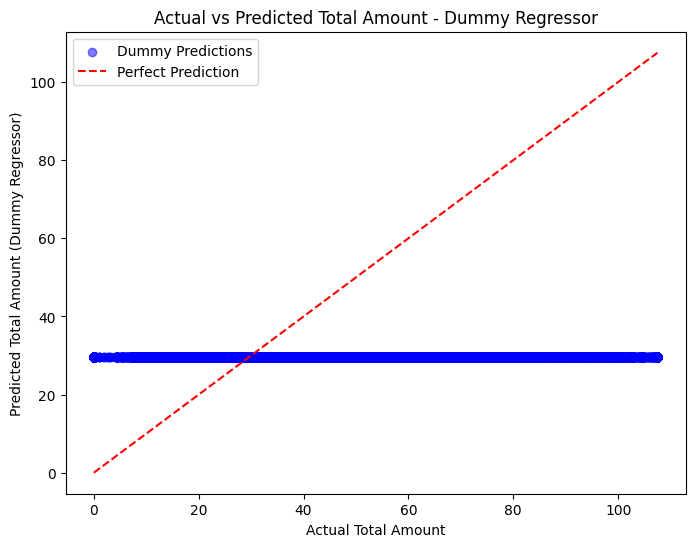

In [ ]:
# Visualize Actual vs Predicted values for Dummy Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_val, dummy_predictions, alpha=0.5, color='blue', label='Dummy Predictions')
plt.xlabel("Actual Total Amount")
plt.ylabel("Predicted Total Amount (Dummy Regressor)")
plt.title("Actual vs Predicted Total Amount - Dummy Regressor")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label="Perfect Prediction")
plt.legend()
plt.show()



> The red dashed line represents a perfect prediction scenario (actual = predicted). Since all predictions lie far from the line, it shows that the dummy regressor is highly inaccurate.

# **15.Linear Regression Model**

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

In [ ]:
# Fit and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_val)
print("\nLinear Regression - Mean Absolute Error (MAE):", mean_absolute_error(y_val, linear_predictions))
print("Linear Regression - R² Score:", r2_score(y_val, linear_predictions))




Linear Regression - Mean Absolute Error (MAE): 4.122307074066882
Linear Regression - R² Score: 0.9034038145083451


> Linear Regression: The 0.9033 R² value suggests that the linear regression model is performing well, as it explains most of the variance in the data. This is a strong result and indicates that the linear regression model is a good fit for your data.

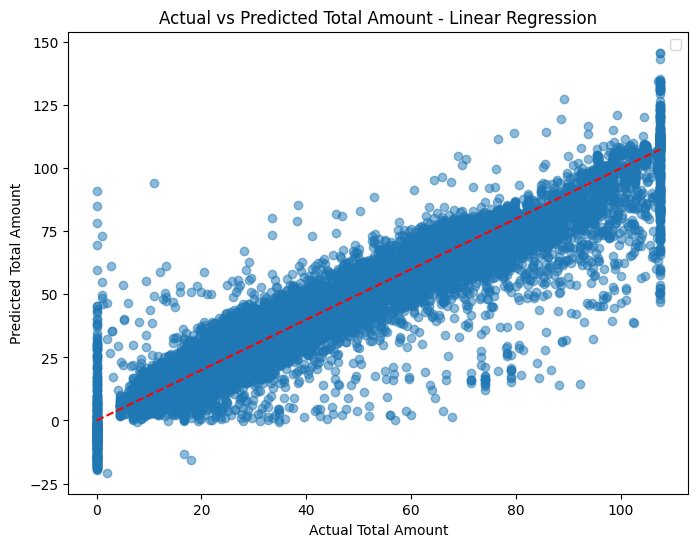

In [ ]:
# Visualize Predictions vs Actual Values
plt.figure(figsize=(8,6))
plt.scatter(y_val, linear_predictions, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Diagonal line (perfect predictions)
plt.xlabel("Actual Total Amount")
plt.ylabel("Predicted Total Amount")
plt.title("Actual vs Predicted Total Amount - Linear Regression")
plt.legend()
plt.show()


> Since the scatter follows a generally linear pattern along the diagonal, it implies that the model has captured the main trend

# **16.Decision Tree Model**

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict and evaluate on the validation set
y_pred_dt = decision_tree_model.predict(X_val)  # Using X_val for predictions
mae_dt = mean_absolute_error(y_val, y_pred_dt)
r2_dt = r2_score(y_val, y_pred_dt)

# Print results
print("Decision Tree:")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")



Decision Tree:
Mean Absolute Error (MAE): 3.3686
R² Score: 0.9334


> The Decision Tree’s ability to handle non-linearity allows it to better fit the data, leading to a higher R² and lower MAE compared to Linear Regression.

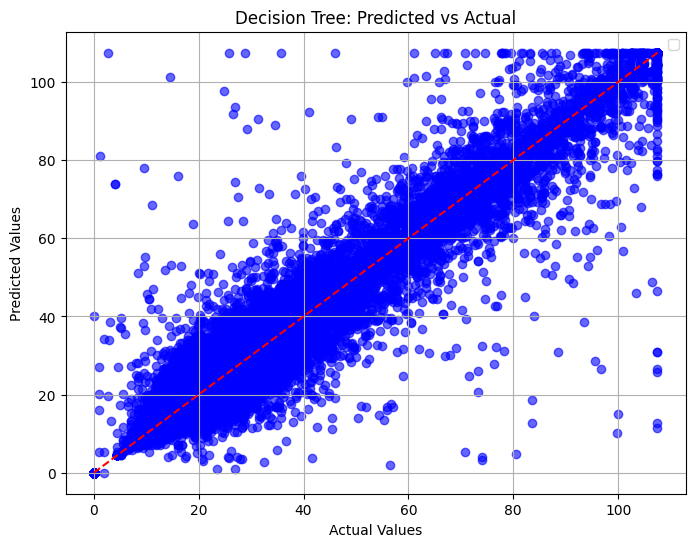

In [ ]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_dt, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Diagonal line (perfect predictions)
plt.title("Decision Tree: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.legend()
plt.show()



# **17.RamdomForest Regressor**

It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict and evaluate on the validation set
y_pred_rf = random_forest_model.predict(X_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Print results
print("Random Forest:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest:
Mean Absolute Error (MAE): 2.4447
R² Score: 0.9644


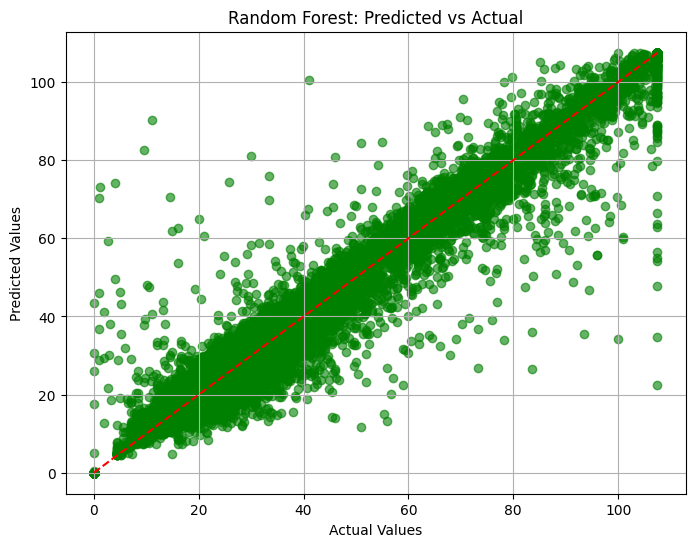

In [ ]:
# Plot Predicted vs Actual for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_rf, color='green', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Diagonal line (perfect predictions)
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


> Random Forest is the best-performing model so far, as it balances the trade-off between bias and variance effectively. It handles non-linear relationships and provides robustness due to its ensemble nature.